In [1]:
from myTreecode import Star
from myTreecode import Tree
from myTreecode import grav_force_star_node
from myTreecode import evolve
from view import view
from view import show_animation
from view import sky_projection

from galaxies import Plummer
from galaxies import Hernquist

import numpy as np
import numpy.random as random

In [5]:

class Galaxy:
    def __init__(self, N=0, system=None):
        self.N = N
        self.t = [0]
        self.system = system if system is not None else [[]]

def merger(galaxy1, galaxy2, r1, r2, v1, v2):
    N = galaxy1.N + galaxy2.N
    new_galaxy = Galaxy(N)

    initial_conditions = []

    for star in galaxy1.system[0]:
        star.x += r1  # shift position
        star.v += v1  # shift velocity
        initial_conditions.append(star)

    for star in galaxy2.system[0]:
        star.x += r2
        star.v += v2
        initial_conditions.append(star)

    new_galaxy .system[0] = initial_conditions
    return new_galaxy 



In [6]:
plum1 = Plummer(1000,10)
plum2 = Plummer(1000,10)

r1 = np.array([0,-30,0])
r2 = np.array([0,30,0])
v1 = np.array([0,3,0])
v2 = np.array([0,-3,0])

new_galaxy = merger(plum1,plum2,r1,r2,v1,v2)

Plummer sphere of 1000 stars and total mass 1000.00 solar masses. Scale parameter b is 10.00 parsecs.
Characteristic velocity is 1.00e+01 in internal units, 6.56e-01 km/s. 
Crossing time is 1.00e+00 in internal units, 1.49e+01 Myr. Relaxation time is 1.45e+01 in internal units, 2.16e+02 Myr.
Plummer sphere of 1000 stars and total mass 1000.00 solar masses. Scale parameter b is 10.00 parsecs.
Characteristic velocity is 1.00e+01 in internal units, 6.56e-01 km/s. 
Crossing time is 1.00e+00 in internal units, 1.49e+01 Myr. Relaxation time is 1.45e+01 in internal units, 2.16e+02 Myr.


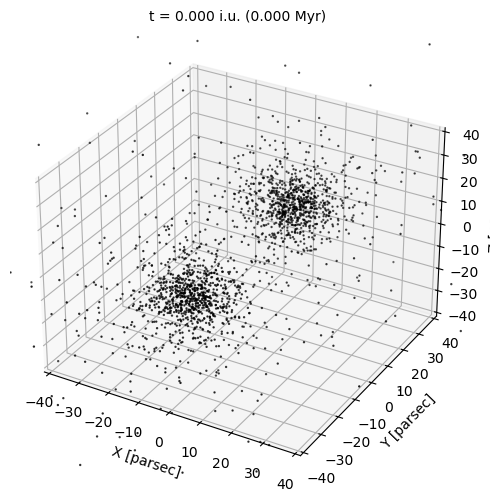

Evolving system:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
view(new_galaxy,r_max = 40)
evolve(new_galaxy,tstop = 1,dt = 0.05,dtout=0.1,eps=0.001,orbit_indexes=[20,60,70,90,1])

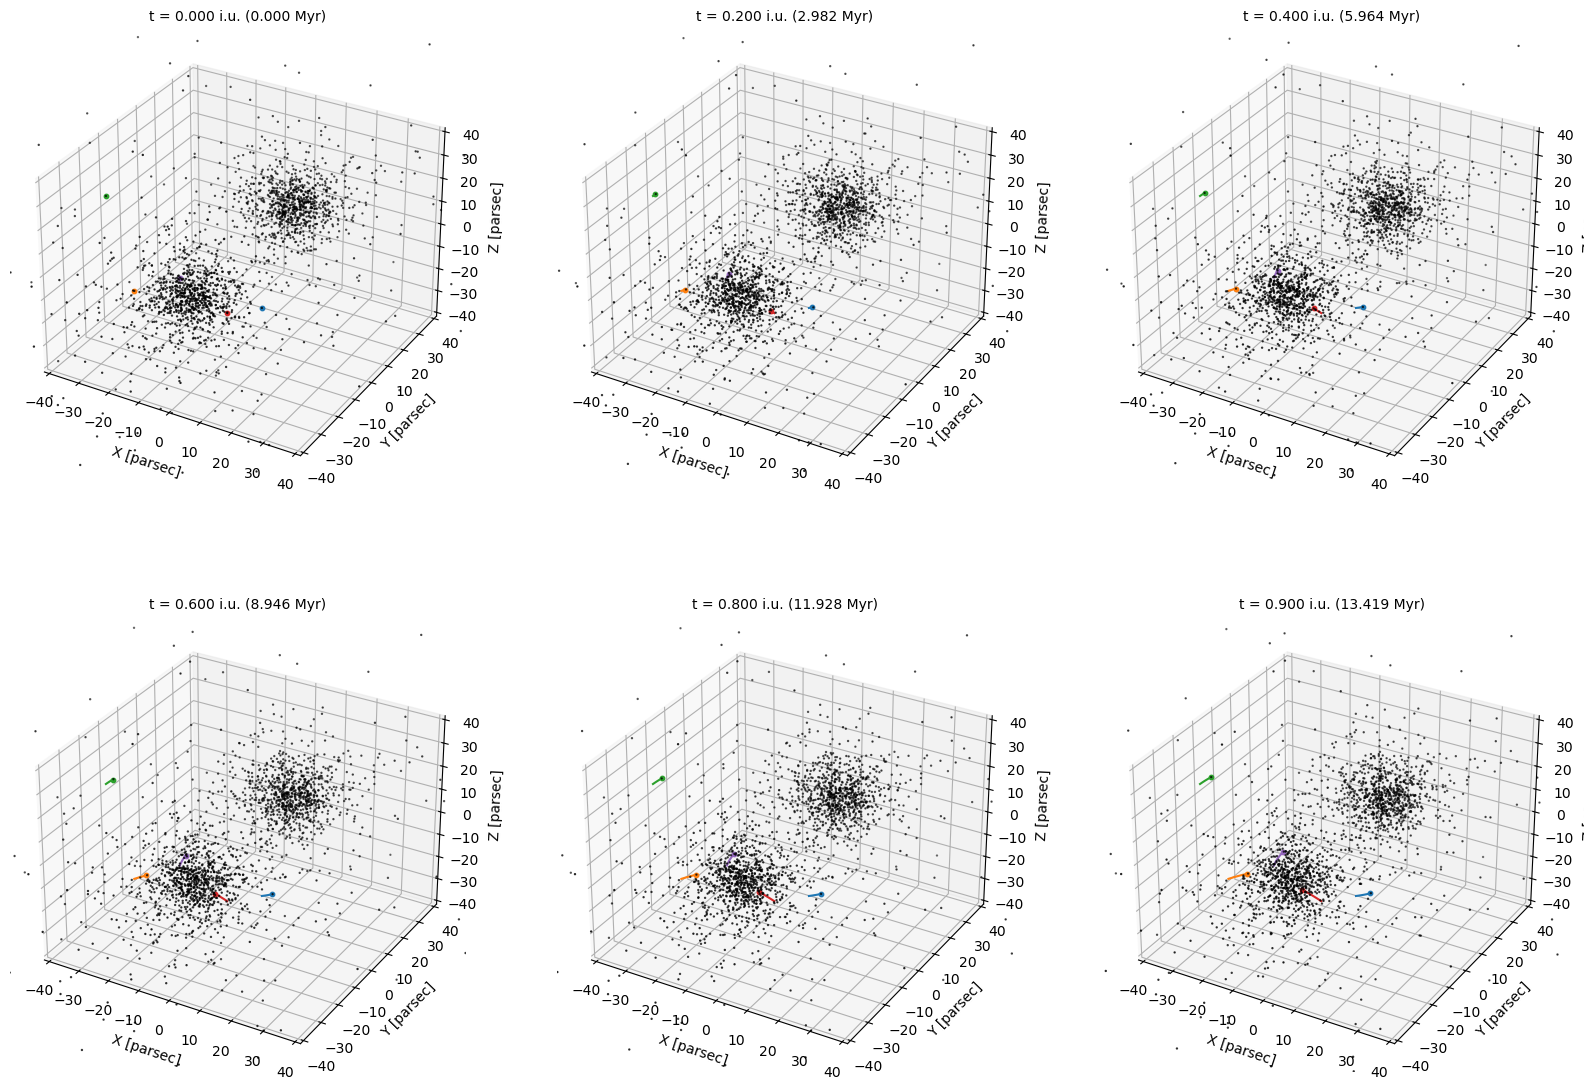

In [9]:
view(new_galaxy,r_max = 40, t=np.linspace(0,1,6))